<a href="https://colab.research.google.com/github/idir15/Classification-des-signaux-cardiaque-ECG-/blob/master/premierteste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


#charger les fichiers normal et abnormal dans une liste 
datalist = [pd.read_csv(''+x+'.csv') for x in ['normal', 'abnormal' ]]
# indexer l'axe des x de 0 a 187
for x in datalist :
    x.columns = list(range(len(x.columns)))





In [ ]:
#concaténation et melange des données 
data = pd.concat(datalist, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
data = data.rename({187: 'label'}, axis=1)

#Generation des données et des labels
label = data['label'].copy()
Data = data.drop('label', axis=1)

#Generation des données et des label d'entrainnement et de test
data_train, data_test, label_train, label_test = train_test_split(
    Data, label, test_size=0.3, random_state=1)


In [ ]:
#declaration de la forme des entrées
inputs = keras.Input(shape=(187,))
#declaration des couches cachees
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
#creation du modele
model = keras.Model(inputs=inputs, outputs=outputs, name="test_model")

Affichage des signaux

In [ ]:
te=1/125
t=np.linspace(0,len(Data.iloc[0])*te,len(Data.iloc[0]))
fig, axs=plt.subplots()
axs.plot(t,Data.iloc[5])
plt.xlabel('temps en sec')
plt.ylabel('amplitude')

NameError: ignored

compilation du RN


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss="BinaryCrossentropy", metrics=["accuracy", keras.metrics.AUC(name="auc")])
history=model.fit(
    data_train,
    label_train,
    validation_split=0.2,
    batch_size=32,
    epochs=250,
    callbacks= [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True
        )
    ]

)

Epoch 1/250
255/255 [==============================] - 5s 5ms/step - loss: 0.6211 - accuracy: 0.7212 - auc: 0.6037 - val_loss: 0.5948 - val_accuracy: 0.7374 - val_auc: 0.6327
Epoch 2/250
255/255 [==============================] - 1s 4ms/step - loss: 0.5874 - accuracy: 0.7214 - auc: 0.6394 - val_loss: 0.5648 - val_accuracy: 0.7374 - val_auc: 0.6566
Epoch 3/250
255/255 [==============================] - 1s 4ms/step - loss: 0.5651 - accuracy: 0.7215 - auc: 0.6694 - val_loss: 0.5458 - val_accuracy: 0.7374 - val_auc: 0.6786
Epoch 4/250
255/255 [==============================] - 1s 4ms/step - loss: 0.5500 - accuracy: 0.7215 - auc: 0.6927 - val_loss: 0.5324 - val_accuracy: 0.7374 - val_auc: 0.7020
Epoch 5/250
255/255 [==============================] - 1s 4ms/step - loss: 0.5382 - accuracy: 0.7219 - auc: 0.7199 - val_loss: 0.5217 - val_accuracy: 0.7388 - val_auc: 0.7240
Epoch 6/250
255/255 [==============================] - 1s 4ms/step - loss: 0.5279 - accuracy: 0.7234 - auc: 0.7415 - val_loss

[0.6210634112358093, 0.587358295917511, 0.5650864839553833, 0.5500110983848572, 0.538162887096405, 0.5279467105865479, 0.5191106200218201, 0.5112484693527222, 0.5040403604507446, 0.4975531995296478, 0.4916019141674042, 0.48617371916770935, 0.48105329275131226, 0.476200133562088, 0.4715162217617035, 0.4671919047832489, 0.4630278944969177, 0.4591391980648041, 0.45524537563323975, 0.4515741765499115, 0.44814932346343994, 0.44485923647880554, 0.44171449542045593, 0.4386872351169586, 0.43578314781188965, 0.43302854895591736, 0.4303451478481293, 0.4278086721897125, 0.4253372550010681, 0.4229368567466736, 0.4206724166870117, 0.4184451401233673, 0.41641050577163696, 0.4143542945384979, 0.41235610842704773, 0.41042959690093994, 0.40864241123199463, 0.406769335269928, 0.4049685299396515, 0.40324342250823975, 0.4016294479370117, 0.39996588230133057, 0.3984168469905853, 0.3968919515609741, 0.3952077329158783, 0.3938722014427185, 0.39245492219924927, 0.3911084830760956, 0.3898036479949951, 0.388426

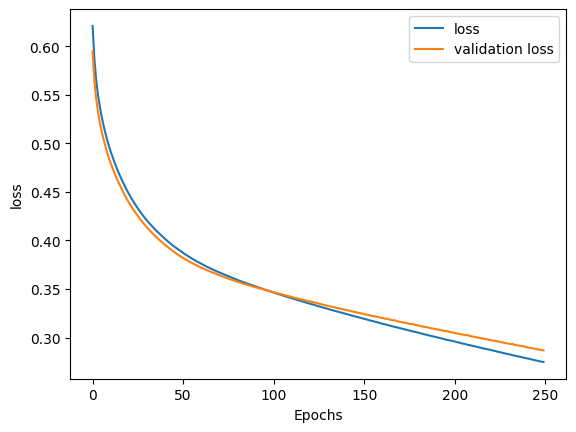

In [ ]:
print(history.history['loss'])
fig,axs=plt.subplots()
axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['loss','validation loss'])

resultats 


In [ ]:
model.evaluate(data_test, label_test)


137/137 [==============================] - 0s 3ms/step - loss: 0.1255 - accuracy: 0.9606 - auc: 0.9880


[0.12552401423454285, 0.9605956673622131, 0.9880127310752869]

test

In [ ]:
y_prediction = model.predict(data_test)
result = confusion_matrix(label_test, np.around(y_prediction))


137/137 [==============================] - 1s 3ms/step


In [ ]:
print(result)

[[1154   85]
 [  87 3039]]


In [ ]:
print(result1)


[[1169   70]
 [  85 3041]]
